<a href="https://colab.research.google.com/github/COMS-BC3159-SP23/colabs/blob/main/Cpp_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C(++) Programming (and Unix Command Line) Review

## Objective: 
Students will be able to understand the concepts of pointers and memory management in the C(++) programming language as well as basic functionality with the Unix Command Line.

## Acknowledgements:
These notes were built with the support of [ChatGPT](https://chat.openai.com/chat) and are heavily inspired (and nicely complemented by) the [Dive into Systems](https://diveintosystems.org/) free online textbook. For more information on these topics please read Chapters 1 and 2 of Dive into Systems. Note: if your background is in Java the Appendix has an alternate version translating between Java and C, while the standard Chapter 1 and 2 are based around translating between Python and C.

## Hello_World.c

In [ ]:
%%writefile hello_world.c

/*
The Hello World Program in C
Note: this is a multi-line comment describing the file.
*/

// C math and I/O libraries
// Note: these are single line comments and load in usefule default libraries
#include <math.h>
#include <stdio.h>



// main function definition
// Note: all C files by default run the main function so don't forget to add one
//       to your code as otherwise it won't do anythign when you run it!
int main() {

    printf("Hello World\n");
    printf("sqrt(4) is %f\n", sqrt(4));

    return 0;  // main returns value 0
}

// Note: you'll notice there that all functions must have defined types and in
//       C(++) you'll find that types must be defined always. This helps with 
//       memory optimizations that can make this code fast!

We can use the command line to view all files in the current working directory by using the `ls` command. We can also use the `ls -al` command to view all files along with additonal information about the file. Note: in Google Colab all command line commands need to be preceeded by a `!` or through a special function like `%%writefile` as shown above.

In [ ]:
!ls -al

You'll see that we have successfully made the `hello_world.c` file in the current folder (which is referred to as `.`). We can now create a folder by using the command `mkdir` and can the move files into that folder with the `mv` command (the `cp` command works similarly and copies files). Finally we can move into that folder with the `cd` command. Note: due to the [design of google colab](https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter) we need to use `%cd` instead of `!cd`.

In [ ]:
!mkdir hello_world
!mv hello_world.c hello_world/hello_world.c
%cd hello_world
!ls -al

Now you shoudl see we have moved into a folder that just has our `hello_world.c` file in it. Lets now compile and run our code. As a compiled language you need to first run a compiler over an C code to produce binary code that the computer can then run. While this two step process may seem cumbersome to those of you coming from a mostly Python background, this allows for additional optimizations to be made to the binary code at compile time that allow the code to be faster at run time. Below is a figure from Dive into Systems that shows this visually!
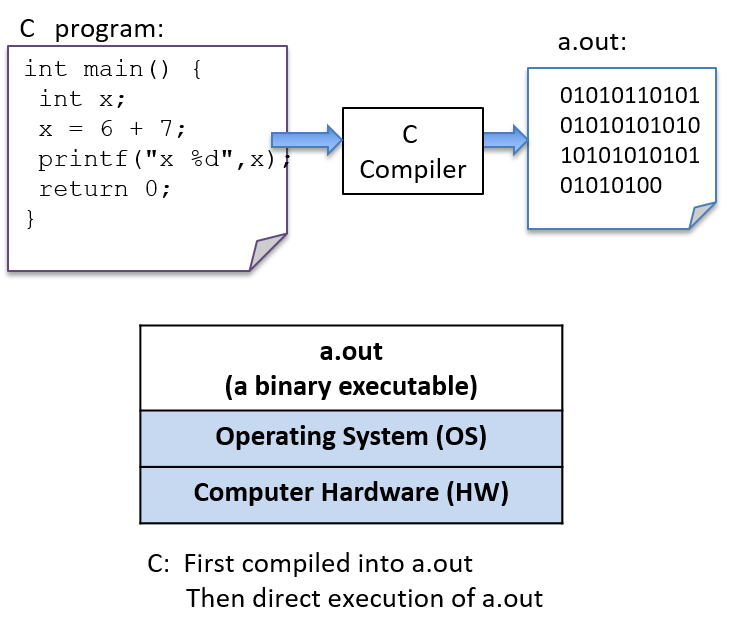

In [ ]:
# Now lets compile our code into a working file!
!gcc hello_world.c -o hello_world.exe

In [ ]:
# And now lets run that code!
!./hello_world.exe

## A More Complex Example

This program demonstrates the use of various basic C programming concepts such as data types, variables, operators, control structures, and functions. The program starts by declaring and initializing variables of different data types such as int, float, and char. Then it uses various arithmetic and assignment operators to perform operations on the variables. After that, it uses control structures such as if-else and for loop to control the flow of the program. Finally, it demonstrates the use of functions by calling the add() function and passing in two parameters.

In [ ]:
# First lets move back up and create a new folder for a new program
%cd ..
!mkdir simple_add
%cd simple_add

In [ ]:
%%writefile simple_add.c

#include <stdio.h>

// Function to demonstrate the use of functions
int add(int a, int b) {
    return a + b;
}

int main() {
    // Data Types
    int age = 25;
    float weight = 68.5;
    char initial = 'J';

    // Variables and Operators
    int x = 5, y = 10;
    int sum = x + y;
    int difference = x - y;
    int product = x * y;
    int quotient = x / y;
    int remainder = x % y;

    // Control Structures
    if (age > 18) {
        printf("You are an adult.\n");
    } else {
        printf("You are a minor.\n");
    }

    for (int i = 0; i < 5; i++) {
        printf("%d\n", i);
    }

    int j = 0;
    while (j < 5) {
        printf("%d\n", j);
        j++;
    }

    // Functions
    int result = add(x, y);
    printf("The sum of %d and %d is %d\n", x, y, result);
    return 0;
}

**Before you run the next cell -- pause and think -- what do you expect the output will be? Write it down on a piece of paper and discuss with your neighbor! Then click!**

In [ ]:
!gcc simple_add.c -o simple_add.exe
!./simple_add.exe

## Pointers

In C we get to directly modify memory addresses. This allows us significantly more control over data movement which we will leverage in this course for acceleration. However, it also can lead to lots of security vulnerabilities and so we'll need to be careful when using pointers.

Ok so what is a pointer? **A pointer is a special kind of variable which holds a memory address!** Aka it "points" at the place in memeory where some value is stored. It turns out that is just what object variables are in Java and Python but in C we are able to treat them simply as numbers and manipulate them a lot more! This also means we can simply pass compact numbers from one function to another instead of all of the data! Below is an image from Dive into Systems that shows this graphically.

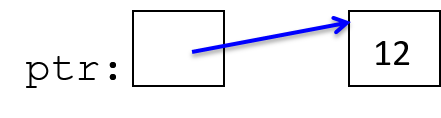

Below you'll find a short code example which demonstrates the basic concepts of pointers in C. It starts by declaring an integer variable called `num` and assigns a value of 5 to it. Then it declares a pointer called `ptr` that can hold an address of an integer. The program assigns the address of the num variable to the pointer using the `&` operator. Then it prints the value of the num variable and the address stored in the pointer.

The program then uses the pointer to modify the value of the `num` variable by dereferencing the pointer using the `*` operator.

It also demonstrates pointer arithmetic by incrementing the pointer and then printing the value stored in the address pointed by the incremented pointer. It uses the `%p` format specifier to print the address stored in the pointer and the `%d` format specifier to print the value stored in the address pointed by the pointer.

In [ ]:
%cd ..
!mkdir pointer
%cd pointer

In [ ]:
%%writefile pointer.c
#include <stdio.h>

int main() {
    // Declare an integer variable
    int num = 5;

    // Declare a pointer to an integer
    int* ptr;

    // Assign the address of the integer variable to the pointer
    ptr = &num;

    // Print the value of the integer variable and the address stored in the pointer
    printf("Value of num: %d\n", num);
    printf("Address of num: %p\n", &num);
    printf("Value stored in ptr: %p\n", ptr);
    printf("Value stored in the address pointed by ptr: %d\n", *ptr);

    // Modify the value of the integer variable using the pointer
    *ptr = 10;
    printf("Value of num after modification: %d\n", num);

    // Pointer arithmetic
    ptr++;
    printf("Value stored in ptr after increment: %p\n", ptr);
    printf("Value stored in the address pointed by ptr after increment: %d\n", *ptr);

    return 0;
}

**Before you run the next cell -- pause and think -- what do you expect the output will be? Write it down on a piece of paper and discuss with your neighbor! Then click!**

In [ ]:
!gcc pointer.c -o pointer.exe
!./pointer.exe

**Compare your results with your neighbor -- do you all get the same result for the final printed value? Is that surprising? Why or why not?** Once you are done talking with your neighbor click the next hidden cell!

<details>
  <summary><b>Click to show the next hidden cell!</b></summary>
  You should find that the "Value stored in ptr" was incremented by 4 as the size of one integer is 4 bytes and so therefore it moved over 4 bytes in memory! Meanwhile the value stored in the address after the increment is likely chaos as we didn't set any values farther in memeory and so now it is just pointing to a random spot in memory which could hold any value! Again pointers will give us lots of power but we'll have to be careful!
</details>

## Arrays

Building on pointers we can next explore dyanmic memory allocation and arrays. These will be crucial for our GPU code.

Lets start by exploring arrays. Arrays are simply contiguous blocks of memory that store values of the same basic type (e.g., `int`, `float`). We can access values in an array by using the `variable[item_number]` syntax. But it is important to know that **an array is just a pointer** so we can use pointer math to access values in it as well as we show in the code below. 

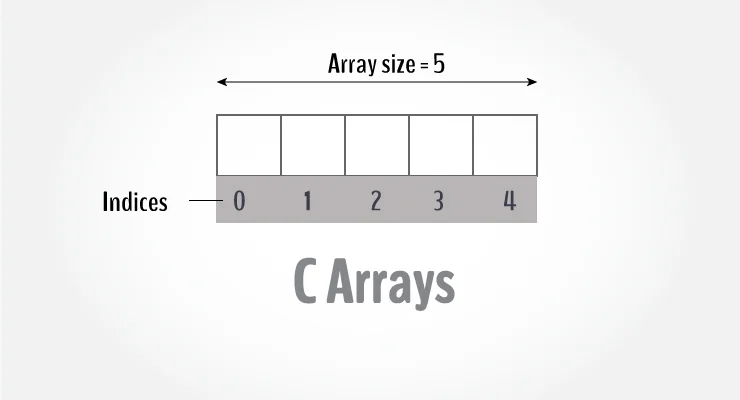

Now lets explore the code! The program demonstrates the basic concepts of arrays in C. It starts by declaring an array of integers called array and assigns 5 elements to it. Then it uses a for loop to iterate through the array and prints each element.

In [ ]:
%cd ..
!mkdir array
%cd array

In [ ]:
%%writefile array.c
#include <stdio.h>

int main() {
    // Declare an array of integers with size 5
    int array[5] = {1, 2, 3, 4, 5};

    // Print each element of the array using a for loop
    for (int i = 0; i < 5; i++) {
        printf("array[%d] = %d\n", i, array[i]);
    }

    // Modify the value of the first element of the array
    array[0] = 10;
    printf("New value of array[0]: %d\n", array[0]);

    // Print each element of the array using pointer math
    for (int i = 0; i < 5; i++) {
        printf("array[%d] = %d\n", i, *(array + i));
    }

    return 0;
}

**Before you run the next cell -- pause and think -- what do you expect the output will be? Will that crazy pointer math work? Why or why not? Write it down on a piece of paper and discuss with your neighbor! Then click!**

In [ ]:
!gcc array.c -o array.exe
!./array.exe

## Dynamic Memory

As stated in Dive into Systems:
"Such dynamic memory allocation allows a C program to request more memory as it’s running, and a pointer variable stores the address of the dynamically allocated space. Programs often allocate memory dynamically to tailor the size of an array for a particular run."

We allocate **and in C(++) have to remember to free** memory using the `malloc` and `free` functions. Below you will find a simple code example showing this! 

In particular this code demonstrates the use of dynamic memory allocation to create an array in C. It starts by declaring a pointer to an integer called `array`. Then it uses the `malloc function` to allocate memory for 5 integers. The malloc function takes one argument, the number of bytes to be allocated, in this case, we want to allocate memory for 5 integers, so we multiply the size of one integer `(sizeof(int))` by 5.

The program checks if the memory allocation was successful by checking if the pointer is `NULL`, and if it is, it prints an error message and exits the program. If the memory allocation was successful, the program assigns values to the array using a for loop and then it prints the values of the array using another for loop.

Finally, the program deallocates memory using the `free` function to free the memory that was allocated by `malloc` so that it can be used by other parts of the program. Rememebr, it's important to keep track of the memory that has been allocated dynamically, as forgetting to deallocate it can cause memory leaks and may lead to other memory-related problems in the future.

In [ ]:
%cd ..
!mkdir malloc
%cd malloc

In [ ]:
%%writefile malloc.c
#include <stdio.h>
#include <stdlib.h>

int main() {
    // Declare a pointer to an integer
    int* array;

    // Allocate memory for 5 integers
    array = (int*) malloc(5 * sizeof(int));

    // Check if the memory allocation was successful
    if (array == NULL) {
        printf("Error allocating memory\n");
        return 1;
    }

    // Assign values to the array
    for (int i = 0; i < 5; i++) {
        array[i] = i;
    }

    // Print the values of the array
    for (int i = 0; i < 5; i++) {
        printf("array[%d] = %d\n", i, array[i]);
    }

    // Deallocate memory
    free(array);

    return 0;
}

In [ ]:
!gcc malloc.c -o malloc.exe
!./malloc.exe

## From C to C++

This program demonstrates the use of objects and templates in C++.

Objects (Classes) in C++ work similarly to those in Java and Python as they can have member variables, functions, etc. Once important thing to keep in mind is `private` vs. `public` items where `private` items can ONLY be accessed by the classes helper functions.

Templates enable you to genericize code WITHOUT losing performance. This is because templates are evaluated at compile time. This means they must be STATIC values at compule time. One way to use this would be to have tempalted magic numbers, another is to have templated types (which we explore below). The downside of templates is that since code is generated for each use case of the template values it can greatly increase compile time and code size but again it usually results in faster code (that a simple variable parameter).

The code example below starts by defining a templated class called Point that represents a `point` in a two-dimensional space. The class has two private member variables `x` and `y` which represent the coordinates of the point and a constructor that takes two arguments and assigns them to the private member variables. The class also has two public member functions `getX()` and `getY()` that return the values of the private member variables and a public member function `isEqual(Point other<T>&)` that compares the current point to another point using the `getX()` and `getY()` member functions of the `Point` class. Finally note that this class is templated by the type `T` this means we can construct a point using any type (`int`, `float`, etc.) for the `x` and `y` variables. That said due to our definition of `isEqual` it needs to be a type where the `==` operator can compare the `x` and `y` values.

The code then has a `compare` function which takes in two points of the same templated type and compares them using the `isEqual` function.

In the main function, it creates two `Point` objects, and then uses the template function `compare` to compare them, if the points have the same coordinates, the program will print "The points are equal" else it will print "The points are not equal".

In [ ]:
%cd ..
!mkdir template
%cd template

In [ ]:
%%writefile template.cpp
#include <iostream>
using namespace std;

// Templated class definition for a simple Point object
template <typename T>
class Point {
    private:
        T x, y;
    
    public:
        
        Point(T x, T y) {
            this->x = x;
            this->y = y;
        }
        
        T getX() { return x; }
        T getY() { return y; }

        // we need the & here as the <T> generally specifies a specific instance
        // of the class with that type and not a pointer to one
        bool isEqual(Point<T>& other) {
            return (x == other.getX()) && (y == other.getY());
        }
};

template <typename T>
void compare(Point<T>& a, Point<T>& b){
    // Compare the two Point objects using the template function
    if (a.isEqual(b)) {
        cout << "The points are equal" << endl;
    } else {
        cout << "The points are not equal" << endl;
    }
    return;
}

int main() {
    // Create two Point objects with integer x and y values
    Point<int> p1(1, 2);
    Point<int> p2(3, 4);

    // Create two Point objects with float x and y values
    Point<float> p3(1.7, 2.3);
    Point<float> p4(1.7, 2.3);

    // Compare p1 to p2
    compare(p1,p2);

    // Compare p3 to p4
    compare(p3,p4);

    // Compare p1 to p4
    compare(p1,p4);

    return 0;
}

**Before you run the next cell -- pause and think -- what do you expect the output will be? Write it down on a piece of paper and discuss with your neighbor! Then click!**

Also note that we moved from `gcc` to `g++` as we moved from C to C++

In [ ]:
!g++ template.cpp -o template.exe
!./template.exe

<details>
  <summary><b>Did that output surprise you? Why do you think that happened? Click to learn more!</b></summary>
  You should Have gotten a compilation error! This is because we are trying to compare an `int` point (`p1`) to a `float` point (`p4`). As they aren't the same type (the template counts as part of the type) this will fail compilation. Go comment out that line and re-run the cells above -- now does it do what you expect?
</details>